<a href="https://colab.research.google.com/github/canimzali/Data_Science_Project/blob/main/insurance_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('insurance.csv')

In [7]:
df.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
df.duplicated().sum()


0

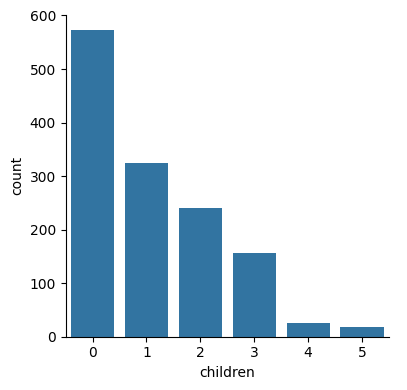

In [29]:
sns.catplot(x="children", kind="count", data=df, height=4)

In [31]:
df['children'].value_counts()


children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

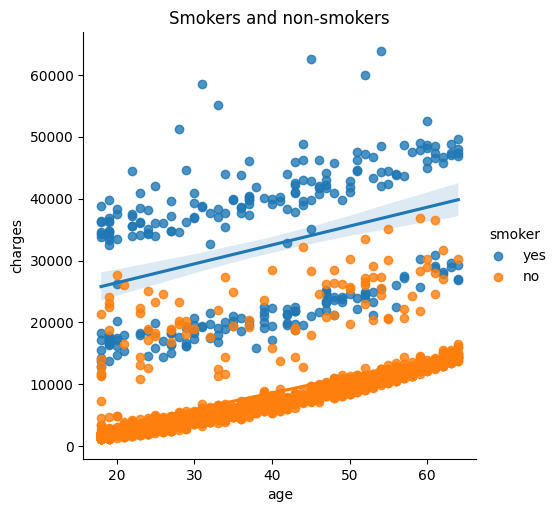

In [36]:
lm = sns.lmplot(x="age", y="charges", hue="smoker", data=df)


lm.set(title='Smokers and non-smokers')


plt.show()

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
df=pd.get_dummies(df,columns=["sex","smoker","region"],drop_first=True)

In [45]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [47]:
y=df['charges']
x=df.drop(columns=["charges"])

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=52,train_size=0.8)

In [49]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
model.score(x_test,y_test)

0.7626577831261664

In [50]:
rf=RandomForestRegressor()
model=rf.fit(x_train,y_train)
model.score(x_test,y_test)

0.8216468743974112

In [51]:
x.head(3)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,False,True,False,False,True
1,18,33.77,1,True,False,False,True,False
2,28,33.00,3,True,False,False,True,False


In [52]:
# A guy who doesn't use to cigarette his life, it is less of the bill.#

model.predict([[24,23.5,0,1,0,1,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3741.0617374])

In [63]:
#If you smoke cigarette, you need to pay 13K $ $


model.predict([[24,23.5,0,1,1,1,0,0]])



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([16701.3235155])